In [3]:
import numpy as np #for numerical operations
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for statistical data visualization
from sklearn.model_selection import train_test_split  #for splitting the dataset
from xgboost import XGBRegressor  #gradient boosting library
from sklearn import metrics #for model evaluation
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning


# Data collection and Preprocessing

In [4]:
#loading the data from csv file to pandas data frame
calories=pd.read_csv('calories.csv')


In [5]:
print(calories.shape) #printing data shape

(15000, 2)


In [6]:
calories.head() #printing data head

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
excercise=pd.read_csv('exercise.csv') #reading exercise dataset

In [8]:
excercise.shape #printing data shape

(15000, 8)

In [9]:
excercise.head() #printing data head

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# Combining the two data frames

In [10]:
calories_data=pd.concat([excercise,calories['Calories']],axis=1) #combining data frames

In [11]:
calories_data.head() #printing data head

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
calories_data.shape #printing data shape

(15000, 9)

In [13]:
#accessing more information about the given dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
#checking for missing values in the dataset

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
#Data Analysis- statistical methods

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualisation

In [16]:
sns.set()

<AxesSubplot: xlabel='Gender', ylabel='count'>

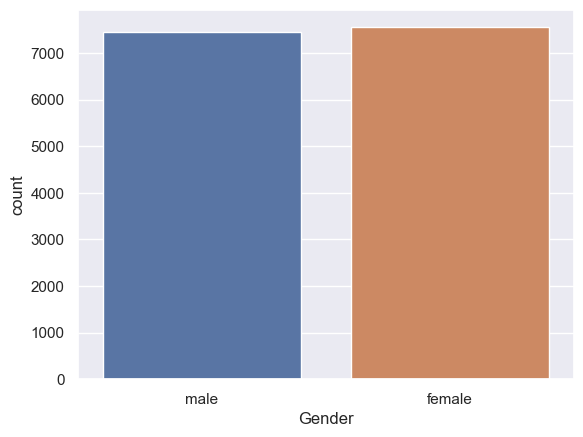

In [17]:
#plotting gender column to number of males and females using a plot chart

sns.countplot(calories_data,x='Gender')

/var/folders/wz/97qxnv5j30sdd4tb7xpnl88h0000gn/T/ipykernel_83640/3367991676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Age', ylabel='Density'>

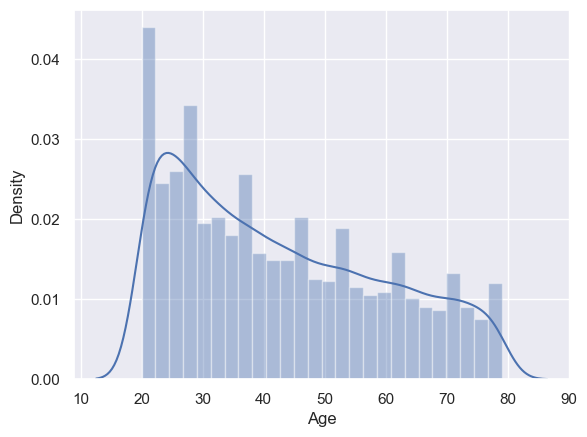

In [18]:
#finding the distribution of "Age" column within the dataset
sns.distplot(calories_data['Age'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


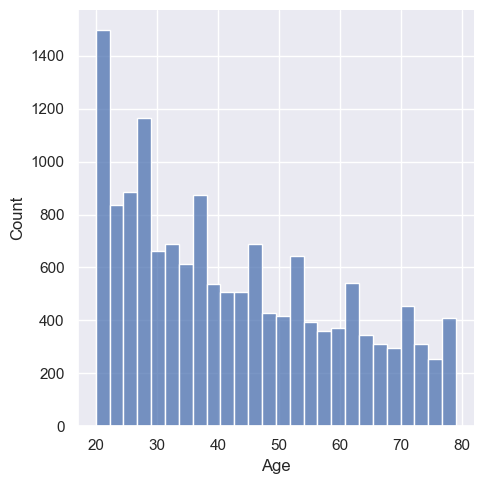

In [19]:
sns.displot(calories_data['Age']) #creating distribution chart for correlations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Age', ylabel='Count'>

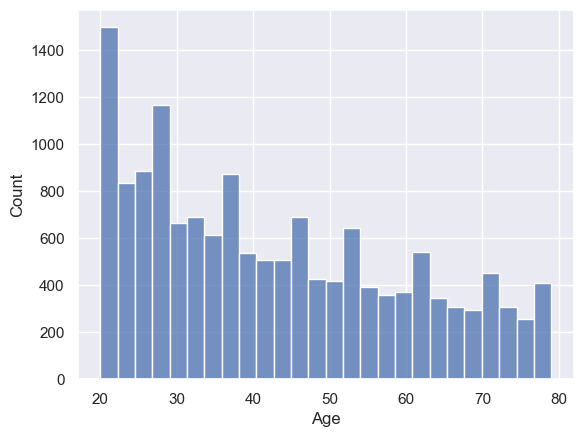

In [20]:
sns.histplot(calories_data['Age']) #creating a histogram for correlations between variables

/var/folders/wz/97qxnv5j30sdd4tb7xpnl88h0000gn/T/ipykernel_83640/178982985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Height', ylabel='Density'>

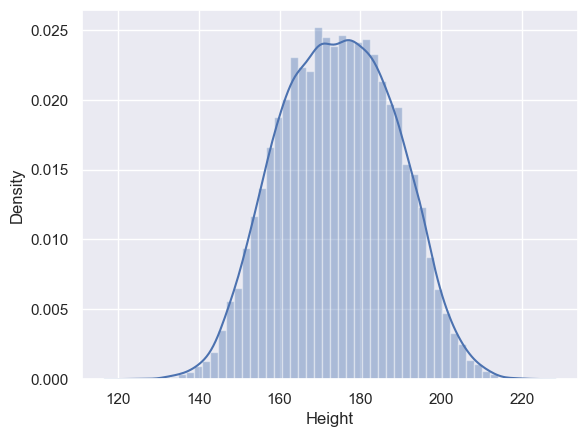

In [21]:
#finding the distribution of "Height" column within the dataset
sns.distplot(calories_data['Height'])

/var/folders/wz/97qxnv5j30sdd4tb7xpnl88h0000gn/T/ipykernel_83640/3057770523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Weight', ylabel='Density'>

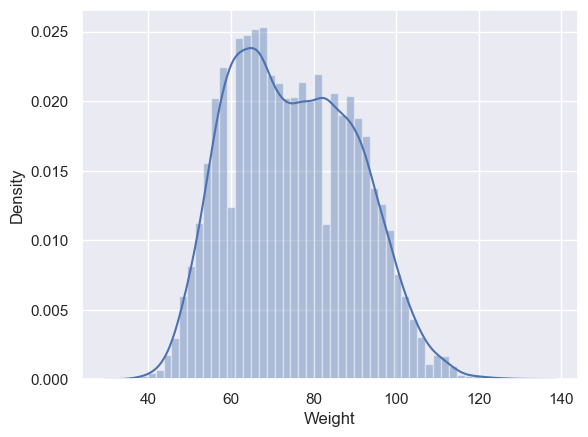

In [22]:
#finding the distribution of "Weight" column within the dataset
sns.distplot(calories_data['Weight'])

/var/folders/wz/97qxnv5j30sdd4tb7xpnl88h0000gn/T/ipykernel_83640/1910284300.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Heart_Rate', ylabel='Density'>

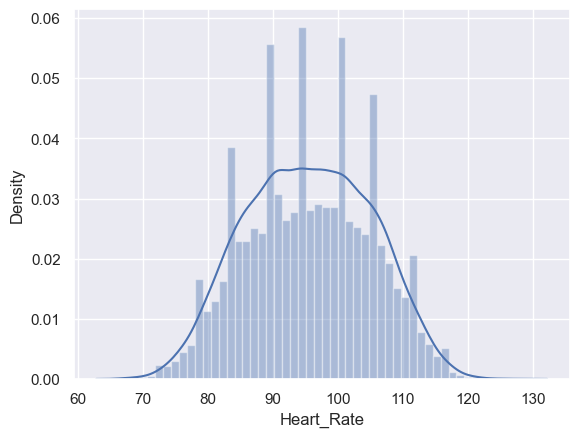

In [23]:
#finding the distribution of "Heart-Rate" column within the dataset
sns.distplot(calories_data['Heart_Rate'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


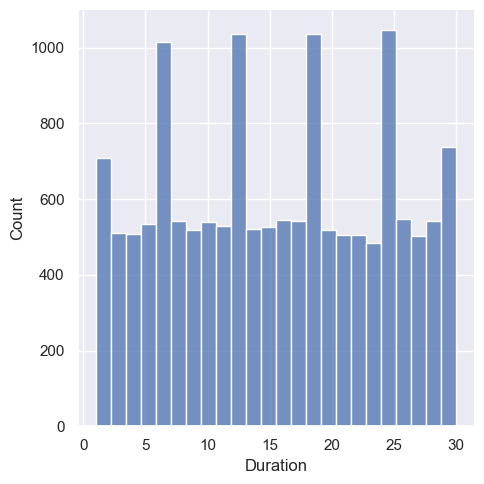

In [24]:
#finding the distribution of "Duration" column within the dataset
sns.displot(calories_data['Duration'])

In [25]:
#one hot encoding the categorical data received

calories_data['Gender']=pd.Categorical(calories_data['Gender'])
calories_data_encoded=pd.get_dummies(calories_data,columns=['Gender'])

In [26]:
correlation_matrix=calories_data_encoded.corr()

<AxesSubplot: >

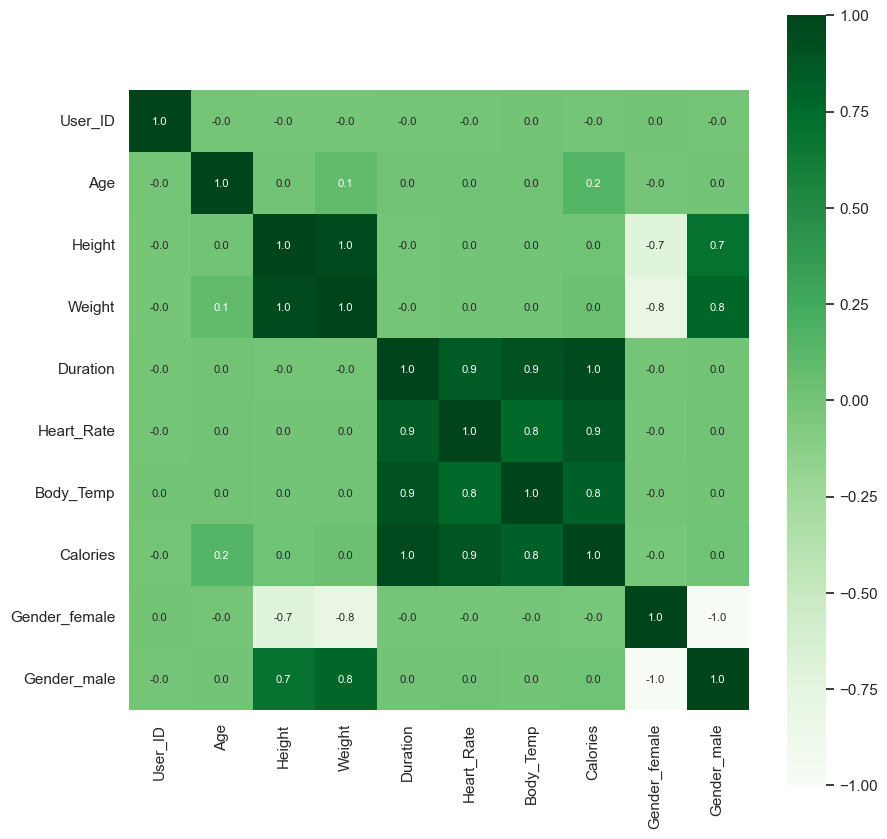

In [27]:
#constructing a heatmap to understsnad the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [28]:
#without categorical values

calories_data['Gender'] = pd.Categorical(calories_data['Gender'])


categorical_columns = calories_data.select_dtypes(include=['category']).columns

#excluding categorical columns from correlation calculation
numeric_columns = calories_data.drop(columns=categorical_columns)
correlation = numeric_columns.corr()

<AxesSubplot: >

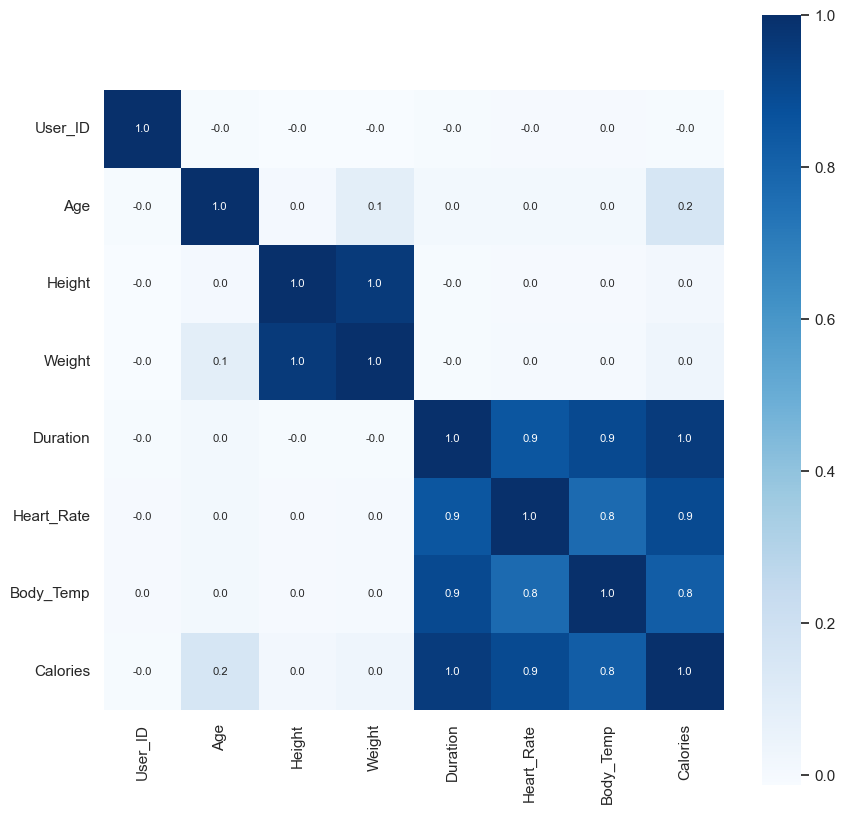

In [29]:
#constructing a heatmap to understsnad the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [30]:
calories_data.head() #printing data head

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [31]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True) #using replace

In [32]:
calories_data.head() #printing data head

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Separating features and Target

In [33]:
#separating the data variables
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)  #storing feature data in X variable
Y=calories_data['Calories'] #storing target data in Y variable

In [34]:
X.head() #printing data head

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [35]:
Y #printing Y variable

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Splitting the data into training data and test data

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2) #using train_test_split for splitting between test and train data

In [37]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) #printing the separated data

(12000, 7) (3000, 7) (12000,) (3000,)


In [38]:
X_train #printing X train data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,1,38,169.0,67.0,3.0,85.0,38.5
9804,0,30,194.0,96.0,9.0,91.0,39.6
7919,1,78,182.0,79.0,7.0,84.0,39.4
4854,0,50,171.0,77.0,29.0,111.0,40.8
5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,1,49,178.0,71.0,12.0,98.0,39.9
13896,1,67,159.0,58.0,23.0,101.0,40.4
6637,1,25,167.0,64.0,20.0,100.0,40.4
2575,1,36,167.0,64.0,28.0,108.0,40.8


In [39]:
X_train=X_train.astype(float) #converting variables to float

In [40]:
print(X_train.head) #printing data head

<bound method NDFrame.head of        Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154      1.0  38.0   169.0    67.0       3.0        85.0       38.5
9804      0.0  30.0   194.0    96.0       9.0        91.0       39.6
7919      1.0  78.0   182.0    79.0       7.0        84.0       39.4
4854      0.0  50.0   171.0    77.0      29.0       111.0       40.8
5947      1.0  32.0   172.0    66.0      29.0       105.0       40.8
...       ...   ...     ...     ...       ...         ...        ...
11798     1.0  49.0   178.0    71.0      12.0        98.0       39.9
13896     1.0  67.0   159.0    58.0      23.0       101.0       40.4
6637      1.0  25.0   167.0    64.0      20.0       100.0       40.4
2575      1.0  36.0   167.0    64.0      28.0       108.0       40.8
7336      0.0  30.0   187.0    88.0      10.0        94.0       40.2

[12000 rows x 7 columns]>


# Model Training

In [41]:
model=XGBRegressor() #initiating regression predictive model

In [42]:
model.fit(X_train,Y_train) #fitting datasets

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation on test data

In [43]:
#prediction from test data

test_data_prediction=model.predict(X_test)

In [44]:
print(test_data_prediction)

[125.94     180.8491    38.636337 ... 148.35341   20.833706  91.403206]


# Mean Absolute Error

In [45]:
mean_abs_error=metrics.mean_absolute_error(Y_test,test_data_prediction) #evaluating mean absolute error for the accuracy of data

In [46]:
print("Mean Absolute error:",mean_abs_error) #printing mae

Mean Absolute error: 9.223079592381914


# Hyperparameter Tuning

In [47]:
#hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

#instantiate XGBoost model
model = XGBRegressor()

#create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, Y_train)

#get the best parameters
best_params = grid_search.best_params_

#train the model with the best parameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)